# Problem 21.2 (RR)

In [1]:
import sympy

量の定義

In [2]:
t, tw, e, m_W, E = sympy.symbols("\\theta, \\theta_w, e, m_W, E", real=True)
p = sympy.sqrt(E**2 - m_W**2)
s = 4 * E**2
m_Z = m_W / sympy.cos(tw)

gamma0 = sympy.Matrix([
[0, 0, 1, 0],
[0, 0, 0, 1],
[1, 0, 0, 0],
[0, 1, 0, 0]
])

gamma1 = sympy.Matrix([
[0, 0, 0, 1],
[0, 0, 1, 0],
[0, -1, 0, 0],
[-1, 0, 0, 0]
])

gamma2 = sympy.Matrix([
[0, 0, 0, -1j],
[0, 0, 1j, 0],
[0, 1j, 0, 0],
[-1j, 0, 0, 0]
])

gamma3 = sympy.Matrix([
[0, 0, 1, 0],
[0, 0, 0, -1],
[-1, 0, 0, 0],
[0, 1, 0, 0]
])

def slashed(vector):
    # vector^mu
    sl = vector[0] * gamma0 - vector[1] * gamma1 - vector[2] * gamma2 - vector[3] * gamma3
    return sl
def prod(vec1, vec2):
    ip = vec1[0] * vec2[0] - vec1[1] * vec2[1] - vec1[2] * vec2[2] - vec1[3] * vec2[3]
    return ip

electron, positronのspinor

In [3]:
u_R = sympy.sqrt(2*E) * sympy.Matrix([0, 0, 1, 0])
v_R = sympy.sqrt(2*E) * sympy.Matrix([0, 0, 0, -1])

$e^-$の運動量$p_1^\mu$，$e^+$の運動量$p_2^\mu$，$W^-$の運動量$k_1^\mu=k_-^\mu$，$W^+$の運動量$k_2^\mu=k_+^\mu$

In [4]:
p_1 = sympy.Matrix([E, 0, 0, E])
p_2 = sympy.Matrix([E, 0, 0, -E])
k_1 = sympy.Matrix([E, p * sympy.sin(t), 0, p * sympy.cos(t)])
k_2 = sympy.Matrix([E, -p * sympy.sin(t), 0, -p * sympy.cos(t)])

$W^-$の偏極ベクトル$\epsilon^{\mu\ast}_{1\bullet}$

In [5]:
e_1Rc = sympy.Matrix([0, sympy.cos(t), -1j, -sympy.sin(t)]) / sympy.sqrt(2)
e_1Lc = sympy.Matrix([0, sympy.cos(t), 1j, -sympy.sin(t)]) / sympy.sqrt(2)
e_1longc = sympy.Matrix([p, E*sympy.sin(t), 0, E*sympy.cos(t)]) / m_W

$W^+$の偏極ベクトル$\epsilon^{\mu\ast}_{2\bullet}$

In [6]:
e_2Rc = sympy.Matrix([0, -sympy.cos(t), -1j, sympy.sin(t)]) / sympy.sqrt(2)
e_2Lc = sympy.Matrix([0, -sympy.cos(t), 1j, sympy.sin(t)]) / sympy.sqrt(2)
e_2longc = sympy.Matrix([p, -E*sympy.sin(t), 0, -E*sympy.cos(t)]) / m_W

In [7]:
def iM_12a(f, af, pol1, pol2):
    coef = - sympy.I * e**2 / s
    mat = af.T * gamma0 * (prod(pol1, pol2) * (slashed(k_1 - k_2)) - slashed(pol1) * prod(2*k_1+k_2, pol2) + slashed(pol2) * prod(k_1+2*k_2, pol1)) * f
    #
    return coef * mat[0, 0]

def iM_12b(f, af, pol1, pol2):
    coef = sympy.I * e**2 / (s-m_Z**2)
    mat = af.T * gamma0 * (prod(pol1, pol2) * (slashed(k_1 - k_2)) - slashed(pol1) * prod(2*k_1+k_2, pol2) + slashed(pol2) * prod(k_1+2*k_2, pol1))* f
    #
    return coef * mat[0, 0]

def dsdc(f, af, pol1, pol2):
    iM = iM_12a(f, af, pol1, pol2) + iM_12b(f, af, pol1, pol2)
    R = e**4 / (48*sympy.pi * E**2)
    dsdc =  sympy.Abs(iM) ** 2 / (64*sympy.pi*E**2 * R)
    dsdc = dsdc.subs([(E, 500), (m_W, 80.433), (tw, sympy.asin(sympy.sqrt(0.22290)))])
    dsdc = dsdc.simplify()
    return dsdc

def plot_dsdc(y, label):
    return sympy.plotting.plot_parametric(sympy.cos(t), y, (t, 0.1, 3), xlabel=r"$\cos\theta$", ylabel=r"$d\sigma/d\cos\theta$", yscale="log", axis_center=(-1, 0.01), legend=True, label=label, show=False)

$e^-_Re^+_L \to W^-_RW^+_R$

In [8]:
display(sympy.nsimplify(sympy.simplify(iM_12a(u_R, v_R, e_1Rc, e_2Rc))))
display(sympy.nsimplify(sympy.simplify(iM_12b(u_R, v_R, e_1Rc, e_2Rc))))
pp = plot_dsdc(dsdc(u_R, v_R, e_1Rc, e_2Rc), r"$(+, +)$")

-I*e**2*sqrt(E**2 - m_W**2)*sin(\theta)/E

4*I*E*e**2*sqrt(E**2 - m_W**2)*sin(\theta)*cos(\theta_w)**2/(4*E**2*cos(\theta_w)**2 - m_W**2)

$e^-_Re^+_L \to W^-_LW^+_L$

In [9]:
display(sympy.nsimplify(sympy.simplify(iM_12a(u_R, v_R, e_1Lc, e_2Lc))))
display(sympy.nsimplify(sympy.simplify(iM_12b(u_R, v_R, e_1Lc, e_2Lc))))
mm = plot_dsdc(dsdc(u_R, v_R, e_1Lc, e_2Lc), r"$(-, -)$")

-I*e**2*sqrt(E**2 - m_W**2)*sin(\theta)/E

4*I*E*e**2*sqrt(E**2 - m_W**2)*sin(\theta)*cos(\theta_w)**2/(4*E**2*cos(\theta_w)**2 - m_W**2)

$e^-_Re^+_L \to W^-_RW^+_L$

In [10]:
display(sympy.nsimplify(sympy.simplify(iM_12a(u_R, v_R, e_1Rc, e_2Lc))))
display(sympy.nsimplify(sympy.simplify(iM_12b(u_R, v_R, e_1Rc, e_2Lc))))
pm = plot_dsdc(dsdc(u_R, v_R, e_1Rc, e_2Lc), r"$(+, -)$")

0

0

$e^-_Re^+_L \to W^-_LW^+_R$

In [11]:
display(sympy.nsimplify(sympy.simplify(iM_12a(u_R, v_R, e_1Lc, e_2Rc))))
display(sympy.nsimplify(sympy.simplify(iM_12b(u_R, v_R, e_1Lc, e_2Rc))))
mp = plot_dsdc(dsdc(u_R, v_R, e_1Lc, e_2Rc), r"$(-, +)$")

0

0

$e^-_Re^+_L \to W^-_LW^+_\text{ln} + W^-_\text{ln}W^+_R$

In [12]:
display(sympy.nsimplify(sympy.simplify(iM_12a(u_R, v_R, e_1Lc, e_2longc) + iM_12a(u_R, v_R, e_1longc, e_2Rc))))
display(sympy.nsimplify(sympy.simplify(iM_12b(u_R, v_R, e_1Lc, e_2longc) + iM_12b(u_R, v_R, e_1longc, e_2Rc))))
mzzp = plot_dsdc(dsdc(u_R, v_R, e_1Lc, e_2longc) + dsdc(u_R, v_R, e_1longc, e_2Rc), r"$(-, 0)+(0, +)$")

2*sqrt(2)*I*e**2*sqrt(E**2 - m_W**2)*(cos(\theta) - 1)/m_W

sqrt(2)*I*E**2*e**2*(8 - 8*cos(\theta))*sqrt(E**2 - m_W**2)*cos(\theta_w)**2/(m_W*(4*E**2*cos(\theta_w)**2 - m_W**2))

$e^-_Re^+_L \to W^-_RW^+_\text{ln} + W^-_\text{ln}W^+_L $

In [13]:
display(sympy.nsimplify(sympy.simplify(iM_12a(u_R, v_R, e_1Rc, e_2longc) + iM_12a(u_R, v_R, e_1longc, e_2Lc))))
display(sympy.nsimplify(sympy.simplify(iM_12b(u_R, v_R, e_1Rc, e_2longc) + iM_12b(u_R, v_R, e_1longc, e_2Lc))))
zmpz = plot_dsdc(dsdc(u_R, v_R, e_1Rc, e_2longc) + dsdc(u_R, v_R, e_1longc, e_2Lc), r"$(+, 0)+(0, -)$")

2*sqrt(2)*I*e**2*sqrt(E**2 - m_W**2)*(cos(\theta) + 1)/m_W

-8*sqrt(2)*I*E**2*e**2*sqrt(E**2 - m_W**2)*(cos(\theta) + 1)*cos(\theta_w)**2/(m_W*(4*E**2*cos(\theta_w)**2 - m_W**2))

$e^-_Re^+_L \to W^-_\text{ln}W^+_\text{ln}$

In [14]:
display(sympy.nsimplify(sympy.simplify(iM_12a(u_R, v_R, e_1longc, e_2longc))))
display(sympy.nsimplify(sympy.simplify(iM_12b(u_R, v_R, e_1longc, e_2longc))))
zz = plot_dsdc(dsdc(u_R, v_R, e_1longc, e_2longc), r"$(0, 0)$")

I*e**2*sqrt(E**2 - m_W**2)*(2*E**2 + m_W**2)*sin(\theta)/(E*m_W**2)

4*I*E*e**2*(-2*E**2 - m_W**2)*sqrt(E**2 - m_W**2)*sin(\theta)*cos(\theta_w)**2/(m_W**2*(4*E**2*cos(\theta_w)**2 - m_W**2))

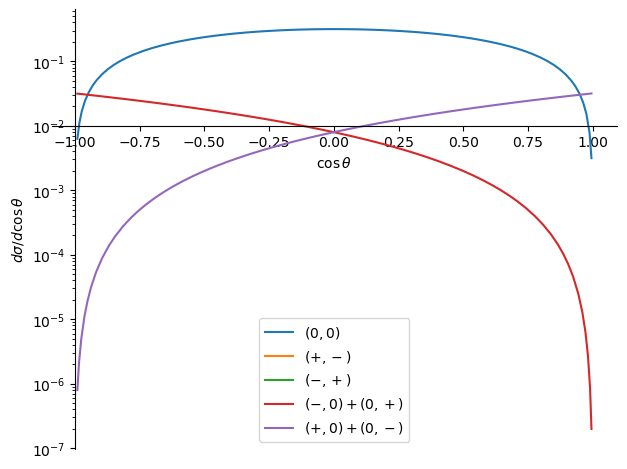

In [15]:
zz.extend(pm)
zz.extend(mp)
zz.extend(mzzp)
zz.extend(zmpz)
zz.show()